In [15]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [16]:
steps = 180

In [32]:
df = pd.read_csv('data.csv', names=('date', 'rssi', 'distance'))
df.head()

,date,rssi,distance
0,21:57.4,-81,30.000000
1,21:57.6,-81,29.833333
2,21:58.0,-80,29.666667
3,21:58.2,-78,29.500000
4,21:58.6,-75,29.333333


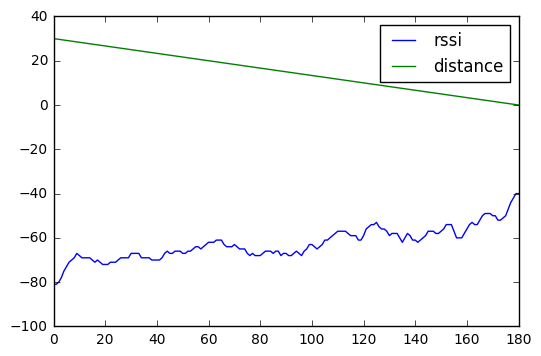

In [33]:
df[['rssi','distance']].plot()

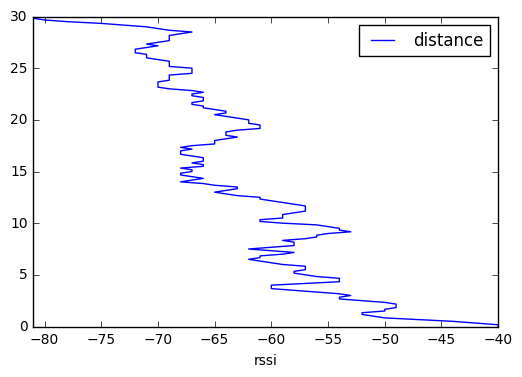

In [34]:
df.plot(x='rssi', y='distance')

In [35]:
matrix = df[['rssi', 'distance']]
matrix

,rssi,distance
0,-81,30.000000
1,-81,29.833333
2,-80,29.666667
3,-78,29.500000
4,-75,29.333333
5,-73,29.166667
6,-71,29.000000
7,-70,28.833333
8,-69,28.666667
9,-67,28.500000


In [36]:
np.save('data.npy', matrix)

In [37]:
df['rssi+1']=df['rssi'].shift(-1)

In [38]:
df.tail()

,date,rssi,distance,rssi+1
176,22:52.5,-47,0.666667,-44.0
177,22:53.1,-44,0.500000,-42.0
178,22:53.4,-42,0.333333,-40.0
179,22:53.7,-40,0.166667,-40.0
180,22:54.1,-40,0.000000,NaN


In [39]:
df.dropna(inplace=True)
df.tail()

,date,rssi,distance,rssi+1
175,22:52.3,-50,0.833333,-47.0
176,22:52.5,-47,0.666667,-44.0
177,22:53.1,-44,0.500000,-42.0
178,22:53.4,-42,0.333333,-40.0
179,22:53.7,-40,0.166667,-40.0


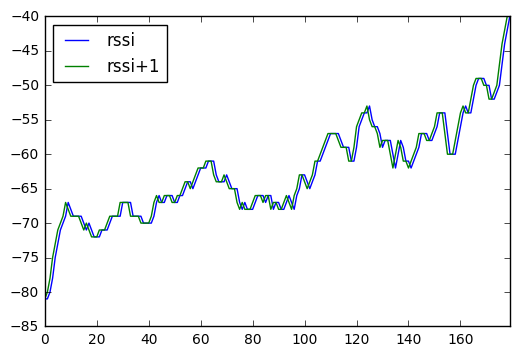

In [40]:
df[['rssi','rssi+1']].plot()

In [41]:
matrix = df[['rssi','rssi+1']].as_matrix()

In [42]:
np.save('rssi_next.npy', matrix)

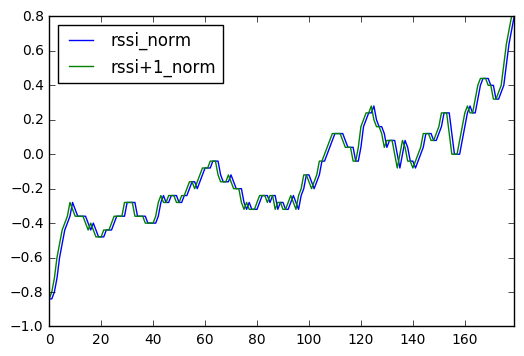

In [71]:
df['rssi_norm'] = (df['rssi'] + 60) / 25
df['rssi+1_norm'] = (df['rssi+1'] + 60) / 25
#matrix = df[['rssi','rssi+1']].as_matrix()/(-100)
#np.save('rssi_next_norm.npy', matrix)
matrix = df[['rssi_norm','rssi+1_norm']].as_matrix()
np.save('rssi_next.npy', matrix)
df[['rssi_norm','rssi+1_norm']].plot()

In [69]:
df

,date,rssi,distance,rssi+1,rssi_norm,rssi+1_norm
0,21:57.4,-81,30.000000,-81.0,-2.1,-2.1
1,21:57.6,-81,29.833333,-80.0,-2.1,-2.0
2,21:58.0,-80,29.666667,-78.0,-2.0,-1.8
3,21:58.2,-78,29.500000,-75.0,-1.8,-1.5
4,21:58.6,-75,29.333333,-73.0,-1.5,-1.3
5,21:58.8,-73,29.166667,-71.0,-1.3,-1.1
6,21:59.2,-71,29.000000,-70.0,-1.1,-1.0
7,21:59.4,-70,28.833333,-69.0,-1.0,-0.9
8,21:59.7,-69,28.666667,-67.0,-0.9,-0.7
9,21:59.8,-67,28.500000,-68.0,-0.7,-0.8
